In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
def tan_f(x=1):
    return np.tan(x)

def tan_df2(x):
    return 2 * np.tan(x) / (np.cos(x) ** 2)

def tan_df3(x):
    return (4 * np.sin(x) ** 2 + 2) / np.cos(x) ** 4

def d_f(f, h, x=1):
    return (f(x + h) - f(x)) / h

def d_f_central(f, h, x):
    return (f(x + h) - f(x - h))/(2 * h)

def real_d_f(f, x=1):
    return 1 + f(x) ** 2

def find_maximum(f, domain):
    res = minimize_scalar(lambda x: -f(x), bounds=domain, method='bounded')
    max_value = -res.fun
    return max_value

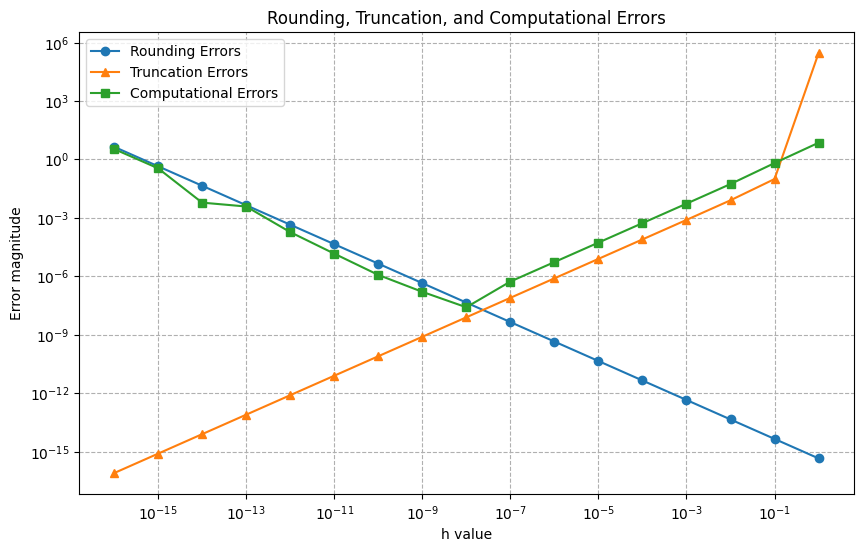

In [3]:
h_values = np.logspace(0, -16, num=17, base=10)
rounding_errors = []
truncation_errors = []
computational_errors = []
x0 = 1

for h in h_values:
    rounding_errors.append(2 * np.finfo(float).eps / h)
    truncation_errors.append(find_maximum(np.tan, (x0 - h, x0 + h)) * h / 2)
    computational_errors.append(abs(real_d_f(np.tan) - d_f(np.tan, h)))

plt.figure(figsize=(10, 6))
plt.loglog(h_values, rounding_errors, label='Rounding Errors', marker='o')
plt.loglog(h_values, truncation_errors, label='Truncation Errors', marker='^')
plt.loglog(h_values, computational_errors, label='Computational Errors', marker='s')
plt.xlabel('h value')
plt.ylabel('Error magnitude')
plt.title('Rounding, Truncation, and Computational Errors')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [4]:
h_min = 2 * math.sqrt(np.finfo(float).eps / abs(tan_df2(x0)))
print(abs(h_min - h_values[8]))

8.763047748195471e-10


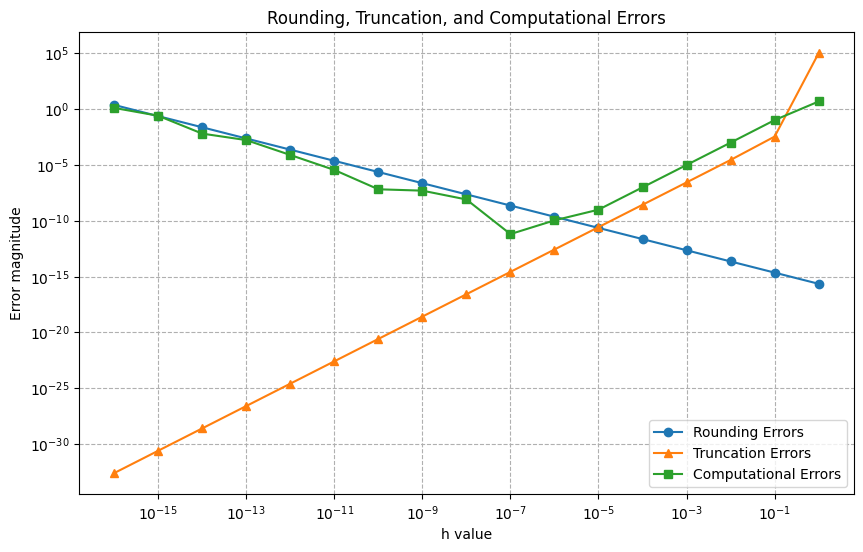

In [5]:
rounding_errors = []
truncation_errors = []
computational_errors = []
x0 = 1

for h in h_values:
    rounding_errors.append(np.finfo(float).eps / h)
    truncation_errors.append(find_maximum(np.tan, (x0 - h, x0 + h)) * h * h / 6)
    computational_errors.append(abs(real_d_f(np.tan) - d_f_central(np.tan, h, x0)))

plt.figure(figsize=(10, 6))
plt.loglog(h_values, rounding_errors, label='Rounding Errors', marker='o')
plt.loglog(h_values, truncation_errors, label='Truncation Errors', marker='^')
plt.loglog(h_values, computational_errors, label='Computational Errors', marker='s')
plt.xlabel('h value')
plt.ylabel('Error magnitude')
plt.title('Rounding, Truncation, and Computational Errors')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [6]:
h2_min = math.pow(3 * np.finfo(float).eps / abs(tan_df3(x0)), 1/3)
print(abs(h_values[7] - h2_min))

2.173274156839064e-06
